# Bandgap Prediction from CNN-Extracted Diffractogram Features and Patolli-Generated Descriptors  

This notebook investigates bandgap prediction in materials using a hybrid feature space that combines:  
- CNN-extracted features from X-ray diffractograms  
- Patolli-generated structural descriptors 

Both classical machine learning (ML) and deep learning (DL) models are explored to evaluate predictive performance on this combined feature set.  


In [1]:
#Import of libraries and utilities
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import datetime
import time
import copy
import os
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, LayerNormalization, Activation, Dropout , add
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
import sklearn.linear_model
import sklearn.neighbors
import sklearn.ensemble
from xgboost import XGBRegressor
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as PRFS
from sklearn.utils import shuffle
from sklearn.metrics import precision_recall_fscore_support as PRFS
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


2025-09-19 22:55:49.273355: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-09-19 22:55:49.292998: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-09-19 22:55:49.298024: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-09-19 22:55:49.310148: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-19 22:55:50.042845: W tensorflow/compiler/tf2

### CNN-extracted descriptors analysis

In [2]:
# Load cnn-extracted splits
traval_df=pd.read_csv("data/cnn_extracted_data/extracted_only_traval.csv")
test_df=pd.read_csv("data/cnn_extracted_data/extracted_only_test.csv")

# Extract target values (bandgaps) as numpy arrays
y_extracted_traval = traval_df[["bg_gga", "bg_gga_opt", "bg_hse", "bg_hse_opt"]].to_numpy()
y_extracted_test = test_df[["bg_gga", "bg_gga_opt", "bg_hse", "bg_hse_opt"]].to_numpy()

# Drop non-feature columns to isolate feature arrays
x_extracted_traval = traval_df.drop(columns=["cif", "bg_gga", "bg_gga_opt", "bg_hse", "bg_hse_opt"]).values
x_extracted_test = test_df.drop(columns=["cif", "bg_gga", "bg_gga_opt", "bg_hse", "bg_hse_opt"]).values

x_extracted_traval.shape

(5425, 160)

Classical machine learning–based predictive modeling algorithms

Linear Regression 

mae: [0.5534038  0.72972855 0.61346533 0.8055032 ]
rmse: [0.71305449 0.94271705 0.81006068 1.05038111]


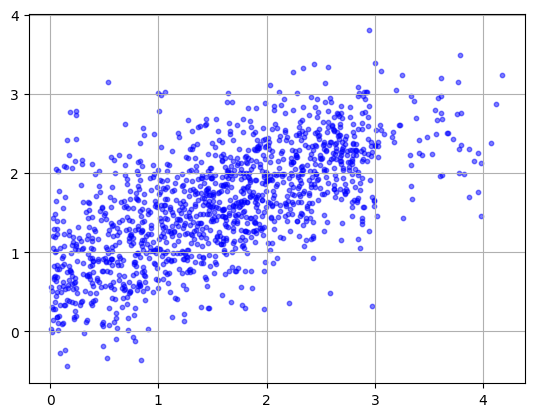

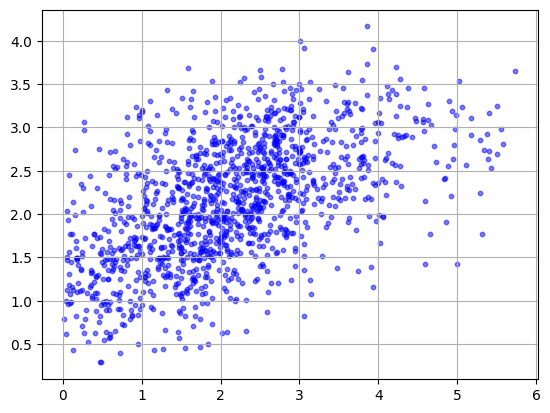

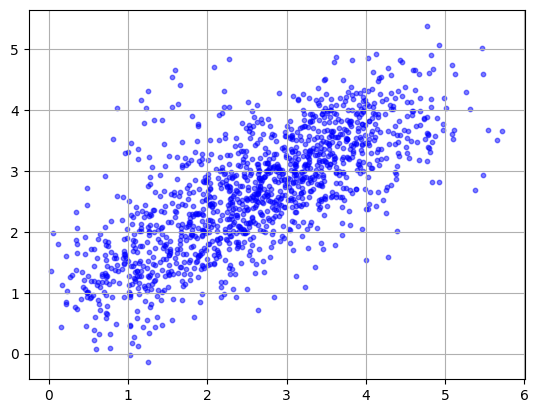

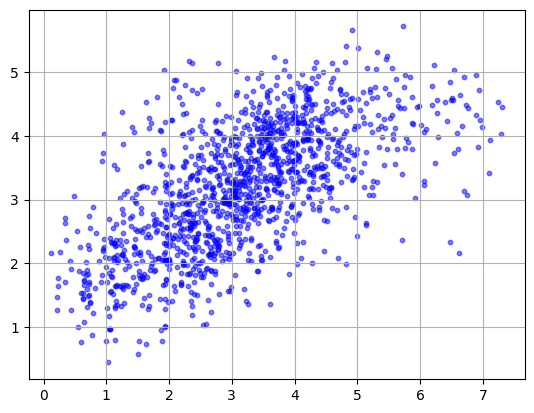

In [3]:
reg = sklearn.linear_model.LinearRegression()
reg.fit(x_extracted_traval,y_extracted_traval)

ptest = reg.predict(x_extracted_test)

print('mae:', abs(y_extracted_test-ptest).mean(axis=0))
print('rmse:', ((y_extracted_test-ptest)**2).mean(axis=0)**0.5)

for item in range(y_extracted_traval.shape[-1]):
    plt.figure()
    plt.scatter(y_extracted_test[:,item],ptest[:,item], s=10, color='blue', alpha=0.5)
    plt.grid(True)
    plt.show()


KNeighbors

mae: [0.52240885 0.69579222 0.57178334 0.75050178]
rmse: [0.69559553 0.93606121 0.77763612 1.02256175]


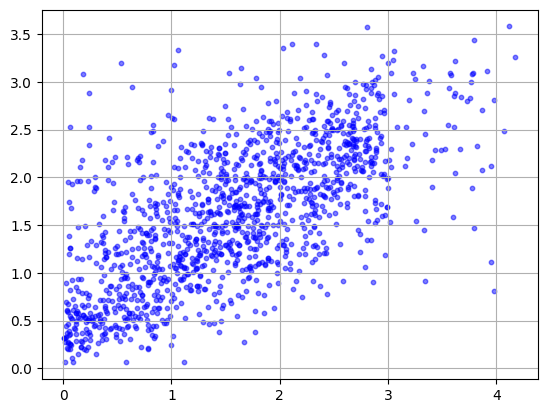

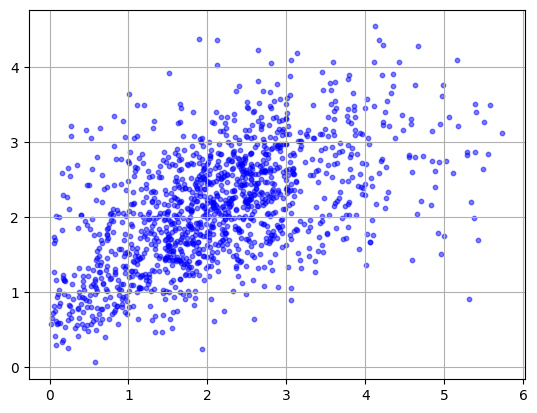

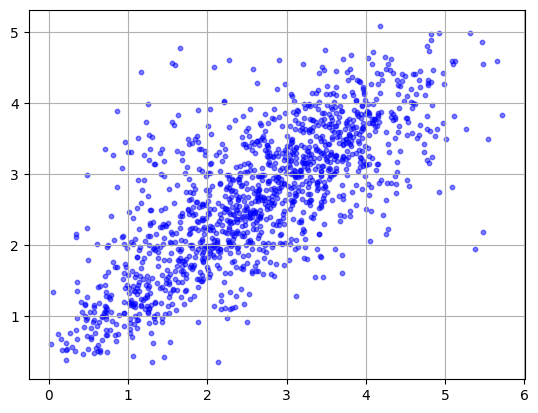

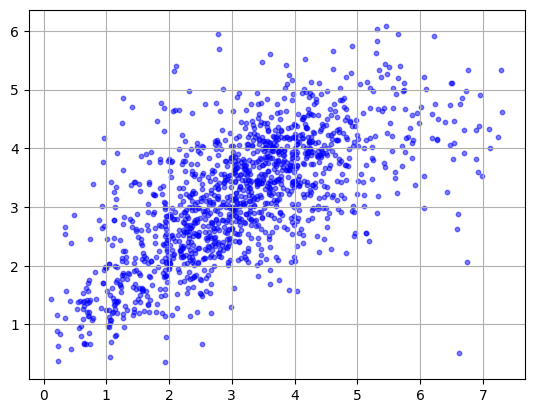

In [4]:
knn = sklearn.neighbors.KNeighborsRegressor()
knn.fit(x_extracted_traval,y_extracted_traval)

ptest = knn.predict(x_extracted_test)

print('mae:', abs(y_extracted_test-ptest).mean(axis=0))
print('rmse:', ((y_extracted_test-ptest)**2).mean(axis=0)**0.5)

for item in range(y_extracted_traval.shape[-1]):
    plt.figure()
    plt.scatter(y_extracted_test[:,item],ptest[:,item], s=10, color='blue', alpha=0.5)
    plt.grid(True)
    plt.show()

RandomForest

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.9s


building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


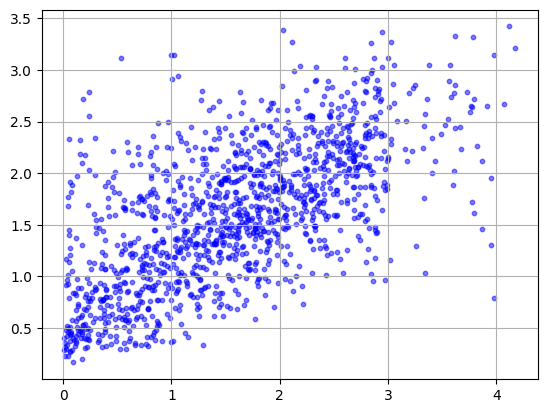

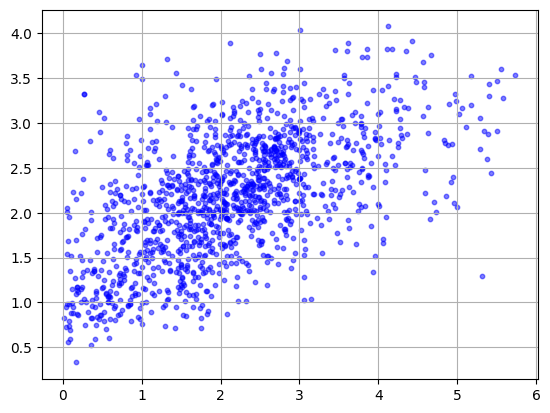

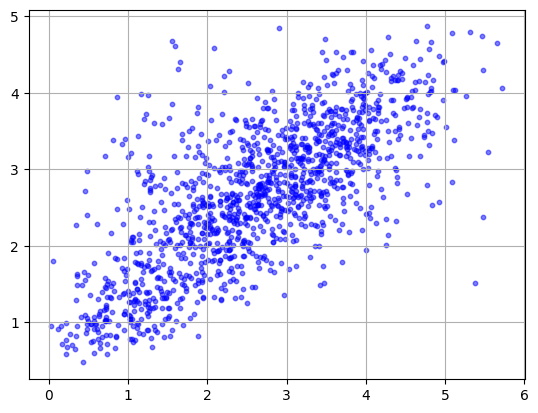

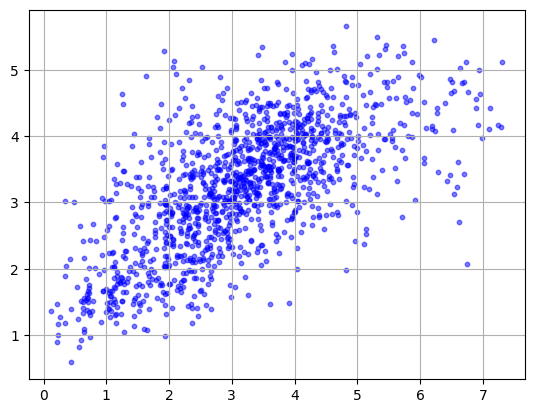

In [5]:
rf = sklearn.ensemble.RandomForestRegressor(n_jobs = -1, verbose=2,random_state=3451)
rf1 = rf.fit(x_extracted_traval,y_extracted_traval)

ptest = rf.predict(x_extracted_test)
print('mae:', abs(y_extracted_test-ptest).mean(axis=0))
print('rmse:', ((y_extracted_test-ptest)**2).mean(axis=0)**0.5)

for item in range(y_extracted_traval.shape[-1]):
    plt.figure()
    plt.scatter(y_extracted_test[:,item],ptest[:,item], s=10, color='blue', alpha=0.5)
    plt.grid(True)
    plt.show()

### Concatenated descriptors analysis (Patolli + CNN extracted)

In [6]:
# Load concatenated sets
traval_concat_df=pd.read_csv("data/concatenated_data/traval_concat_df_2.csv")
test_concat_df=pd.read_csv("data/concatenated_data/test_concat_df_2.csv")

In [7]:
bandgap_cols = ["bg_gga", "bg_gga_opt", "bg_hse", "bg_hse_opt"]
# Extract targets from concatenated splits
yconcat_traval = traval_concat_df[bandgap_cols].to_numpy()
yconcat_test = test_concat_df[bandgap_cols].to_numpy()

#print(yconcat_traval.shape, yconcat_test.shape)

# Extract features only (drop cif + targets)
xconcat_traval = traval_concat_df.drop(columns=["cif"] + bandgap_cols).values
xconcat_test = test_concat_df.drop(columns=["cif"] + bandgap_cols).values

#print(xconcat_traval.shape, xconcat_test.shape)

In [8]:
# Check correlation
"""
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=10):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)  
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

correlations = get_top_abs_correlations(corrdf, 200000).to_string()

filter = ['bg_hse_opt']

with open("correlations.txt", "w") as file:
    for line in correlations.splitlines():
        if any(keyword in line for keyword in filter):
            file.write(line + "\n")

print("Top correlations saved to correlations.txt")
"""



'\ndef get_redundant_pairs(df):\n    pairs_to_drop = set()\n    cols = df.columns\n    for i in range(0, df.shape[1]):\n        for j in range(0, i+1):\n            pairs_to_drop.add((cols[i], cols[j]))\n    return pairs_to_drop\n\ndef get_top_abs_correlations(df, n=10):\n    au_corr = df.corr().abs().unstack()\n    labels_to_drop = get_redundant_pairs(df)  \n    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)\n    return au_corr[0:n]\n\ncorrelations = get_top_abs_correlations(corrdf, 200000).to_string()\n\nfilter = [\'bg_hse_opt\']\n\nwith open("correlations.txt", "w") as file:\n    for line in correlations.splitlines():\n        if any(keyword in line for keyword in filter):\n            file.write(line + "\n")\n\nprint("Top correlations saved to correlations.txt")\n'

Linear Regression

mae: [0.54859953 0.72420361 0.60431609 0.79627597]
rmse: [0.70750222 0.93636115 0.79849839 1.04052525]


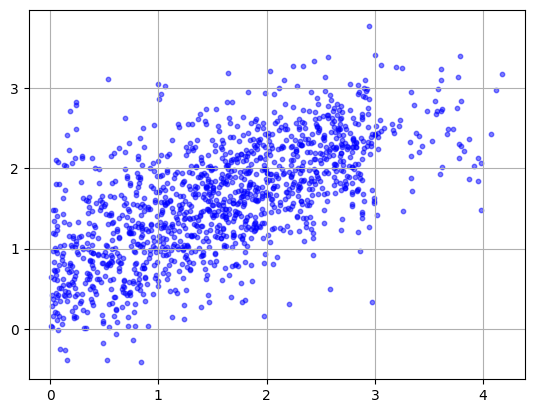

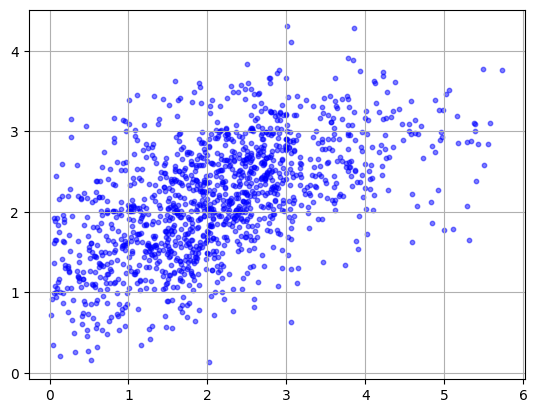

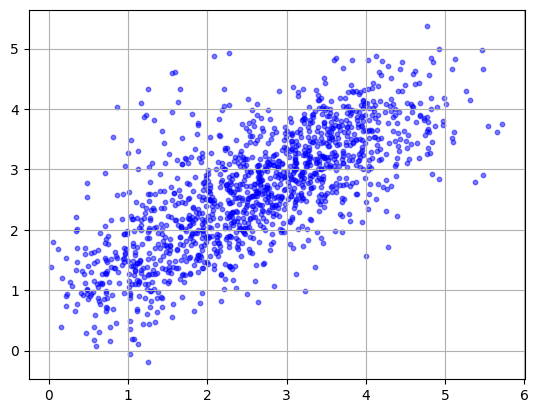

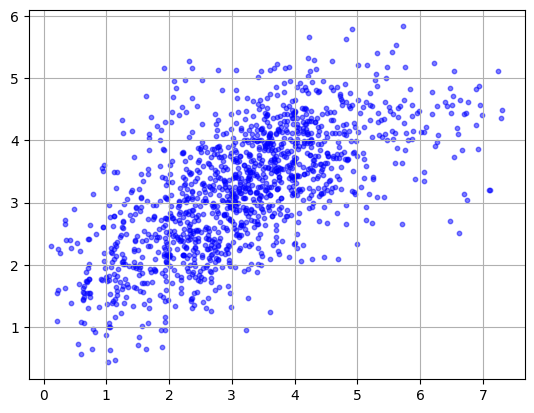

In [9]:
reg2 = sklearn.linear_model.LinearRegression()
reg2.fit(xconcat_traval,yconcat_traval)

ptest = reg2.predict(xconcat_test)

print('mae:', abs(yconcat_test-ptest).mean(axis=0))
print('rmse:', ((yconcat_test-ptest)**2).mean(axis=0)**0.5)

for item in range(yconcat_traval.shape[-1]):
    plt.figure()
    plt.scatter(yconcat_test[:,item],ptest[:,item], s=10, color='blue', alpha=0.5)
    plt.grid(True)
    plt.show()

KNeighbors

mae: [0.50976269 0.68241071 0.56916832 0.73960577]
rmse: [0.68174117 0.90923433 0.76355746 0.98835073]


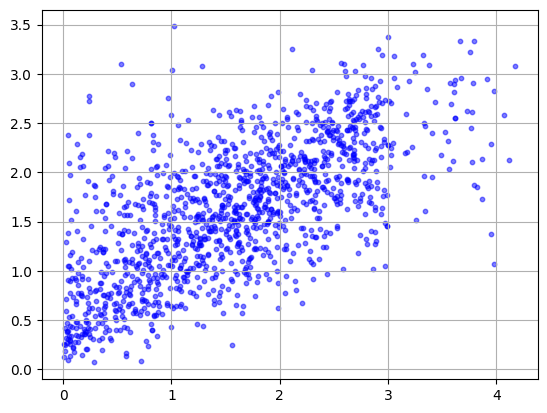

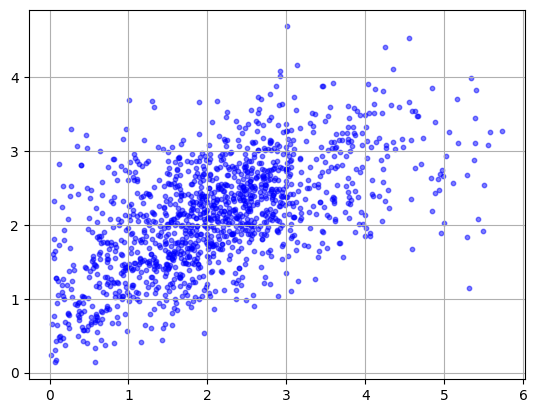

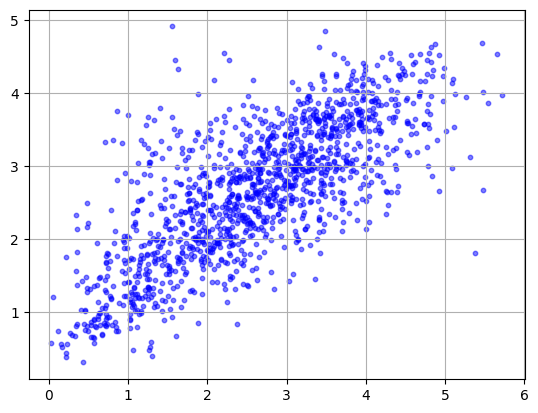

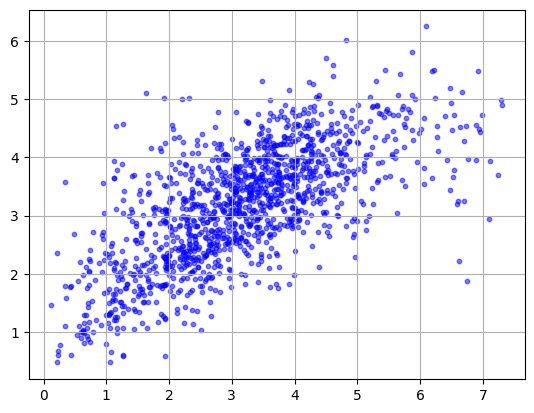

In [10]:
knn2 = sklearn.neighbors.KNeighborsRegressor()
knn2.fit(xconcat_traval,yconcat_traval)

ptest = knn2.predict(xconcat_test)

print('mae:', abs(yconcat_test-ptest).mean(axis=0))
print('rmse:', ((yconcat_test-ptest)**2).mean(axis=0)**0.5)

for item in range(yconcat_traval.shape[-1]):
    plt.figure()
    plt.scatter(yconcat_test[:,item],ptest[:,item], s=10, color='blue', alpha=0.5)
    plt.grid(True)
    plt.show()

RandomForest

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.8s


building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   11.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


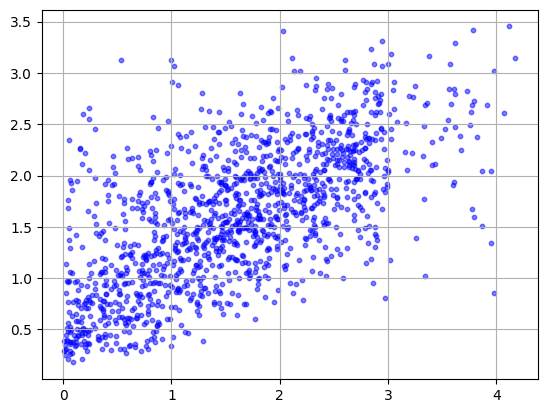

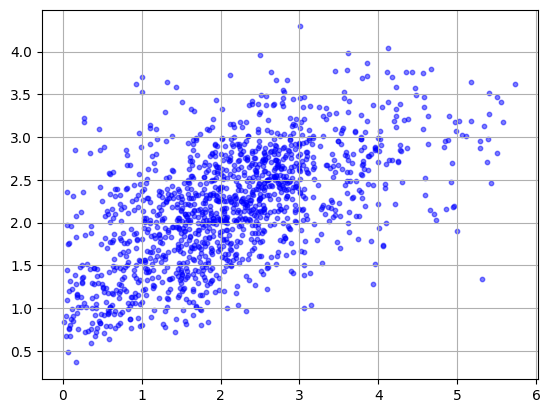

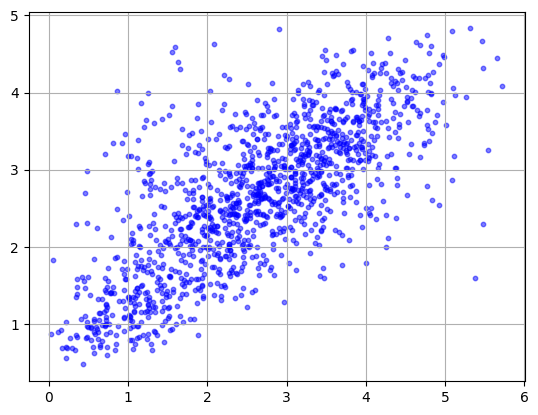

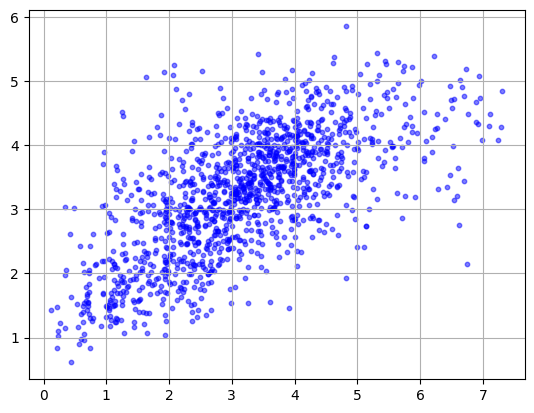

In [11]:

rf2 = sklearn.ensemble.RandomForestRegressor(n_jobs = -1, verbose=2,random_state=3451)
rf2 = rf2.fit(xconcat_traval,yconcat_traval)

ptest = rf2.predict(xconcat_test)

print('mae:', abs(yconcat_test-ptest).mean(axis=0))
print('rmse:', ((yconcat_test-ptest)**2).mean(axis=0)**0.5)

for item in range(yconcat_traval.shape[-1]):
    plt.figure()
    plt.scatter(yconcat_test[:,item],ptest[:,item], s=10, color='blue', alpha=0.5)
    plt.grid(True)
    plt.show()

mae: [0.51196774 0.67710682 0.57493003 0.7396652 ]
rmse: [0.67953872 0.88953566 0.77872224 0.99079768]


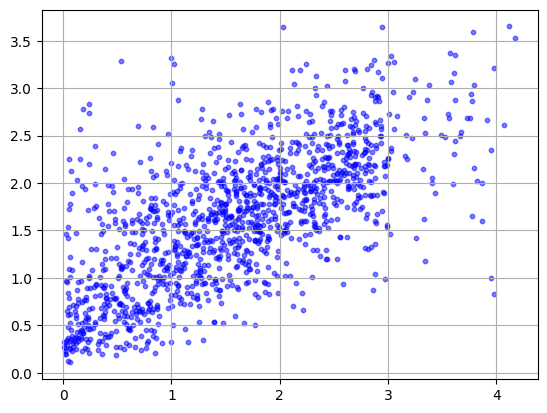

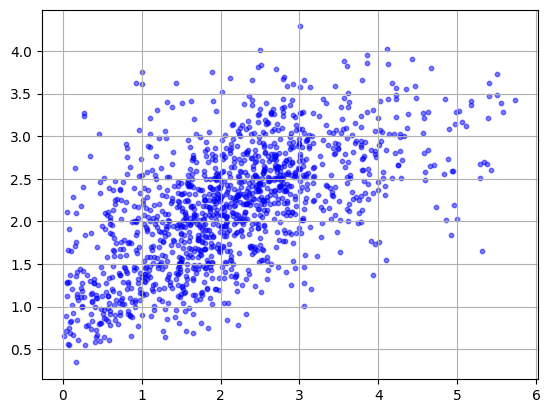

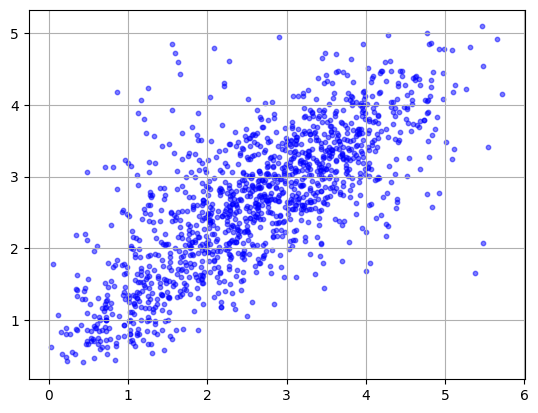

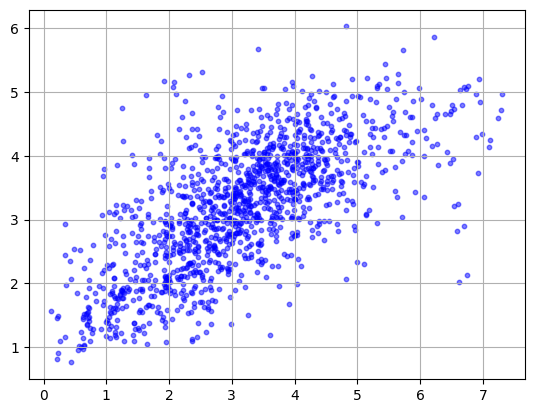

In [12]:
from xgboost import XGBRegressor
xgb = XGBRegressor(learning_rate=0.05,objective='reg:squarederror',random_state=3451)
xgb.fit(xconcat_traval, yconcat_traval)
ptest = xgb.predict(xconcat_test)

print('mae:', abs(yconcat_test-ptest).mean(axis=0))
print('rmse:', ((yconcat_test-ptest)**2).mean(axis=0)**0.5)

for item in range(yconcat_traval.shape[-1]):
    plt.figure()
    plt.scatter(yconcat_test[:,item],ptest[:,item], s=10, color='blue', alpha=0.5)
    plt.grid(True)
    plt.show()

### Deep learning–based predictive modeling

In [13]:
def create_model(xt,yt,neurons,blocks,drop,lr):
    inputs = Input(shape=xt.shape[1:])
    x = inputs
    #x_shortcut=x

    for _ in range(blocks):
        x = Dense(neurons)(x)
        x = LayerNormalization()(x)
        x = Activation('relu')(x)
        x = Dropout(drop)(x)   
        '''''
        if _%2!=0:
            x = Dense(neurons)(x)
            x = LayerNormalization()(x)
            x = Activation('relu')(x)
            x = Dropout(drop)(x)
        else:
            x_shortcut= Dense(neurons)(x_shortcut)
            x_shortcut= LayerNormalization()(x_shortcut)
            x_shortcut= Activation('relu')(x_shortcut)
            x_shortcut= Dropout(d)(x_shortcut)
            x = Dense(neurons)(x)
            x = LayerNormalization()(x)
            x = Activation('relu')(x)
            x = Dropout(drop)(x)    
            x = add([x,x_shortcut])  
            x_shortcut=x
            '''
    #x=add([x,x_shortcut])               
    outputs = Dense(yt.shape[-1], activation='linear')(x)
    # Create the model
    model = Model(inputs=inputs, outputs=outputs)

    # Compile the model
    optim = Adam(learning_rate=lr)
    model.compile(loss='log_cosh', optimizer=optim, metrics=['mse'])

    return model

In [14]:
def create_model2(xt,yt,neurons,blocks,drop,lr):
    inputs = Input(shape=xt.shape[1:])
    x = inputs
    x2=inputs
    x3=inputs
    for _ in range(blocks):
            x = Dense(neurons)(x)
            x = LayerNormalization()(x)
            x = Activation('relu')(x)
            x = Dropout(drop)(x) 
            x2 = Dense(neurons)(x2)
            x2 = LayerNormalization()(x2)
            x2 = Activation('relu')(x2)
            x2 = Dropout(drop)(x2) 
            x3 = Dense(neurons)(x3)
            x3 = LayerNormalization()(x3)
            x3 = Activation('relu')(x3)
            x3 = Dropout(drop)(x3) 
    
    x= add([x,x2,x3])
    outputs = Dense(yt.shape[-1], activation='linear')(x)
    model = Model(inputs=inputs, outputs=outputs)
    # Load the weights into the model
    #model.load_weights('June_12_202457_2024_concat_0.0001_2960_0.1_128_2_blocks_150__O/June_12_202457_2024_concat_0.0001_2960_0.1_128_2_blocks_150.keras', skip_mismatch=True)
    optim = Adam(learning_rate=lr)
    model.compile(loss='log_cosh', optimizer=optim, metrics=['mse'])
    return model



In [15]:
def plot_graphs(history, model_name, ytest, ptest):
    """
    Function to plot model performance visualizations and metrics.
    Parameters: 
        history : training history object returned by `model.fit()`, containing loss and metric values per epoch.
        model_name:str, name of the model, used for plot titles and saved file names.
        ytest: array-like, actual target values from the test set.
        ptest: array-like, predicted target values from the model on the test set.
    Returns:
        None
        Saves PNG images of:
        - Training loss and metric curves over epochs.
        - Histogram comparing actual vs. predicted values.
        - Scatter plot of actual vs. predicted values.
    """
    # Plot the loss
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','Val'], loc='upper right')
    # Plot mse
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mse'])
    plt.plot(history.history['val_mse'])
    plt.title('Model mse')
    plt.ylabel('mse')
    plt.xlabel('Epoch')
    plt.legend(['Train','Val'], loc='upper right')
    
    plt.savefig(f'{model_name}/loss_mse_plot.png')
    plt.close()
    # Plot predicted vs real values
    for item in range(ytest.shape[-1]):
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.scatter(ytest[:,item],ptest[:,item], s=10, color='purple', alpha=0.5)
        plt.grid()
        plt.xlabel(r'actual band gap (eV)')
        plt.ylabel(r'predicted bandgap (eV)')
    #plt.plot(np.arange(-1,7), np.arange(-1,7), linewidth=1, color='black')
        plt.title('Actual vs Predicted Values')
    # Plot histograms of actual and predicted values
        ytest_plot = ytest[:,item]
        ptest_plot = ptest[:,item]
        plt.subplot(1, 2, 2)
        plt.hist(ytest_plot, bins=200, color='blue')
        plt.hist(ptest_plot, bins=200, color='red', alpha=0.5)
        plt.title('Histogram of Actual and Predicted Values')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.legend(['Actual', 'Predicted'], loc='upper right')
    
        plt.savefig(f'{model_name}/real_vs_predicted_{item}.png')
        plt.close()
    
    for item in range(ytest.shape[-1]):
        residuals = ytest[:,item] - ptest[:,item]
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.hist(residuals, bins=50, color='blue', alpha=0.5)
        plt.title('Histogram of Actual and Predicted Values')
        plt.xlabel('E_actual-E_predicted (eV)')
        plt.ylabel('Frequency')
    
        plt.savefig(f'{model_name}/Distribution_{item}.png')
        plt.close()

In [16]:

class BandgapModel:
    """
    Deep learning model wrapper for band gap prediction.

    This class encapsulates the creation, training, and evaluation of deep neural
    networks for supervised band gap prediction tasks. It supports multiple
    architecture versions and uses TensorFlow's Functional API for model
    construction.

    Parameters
    ----------
    neurons : int, optional (default=64), number of neurons per hidden layer.
    blocks : int, optional (default=3), number of hidden layers (network depth).
    drop : float, optional (default=0.2), dropout rate between 0.0 and 1.0 applied to reduce overfitting.
    lr : float, optional (default=0.001), learning rate for the optimizer.
    version : int, optional (default=1), model architecture version. If 1, uses `create_model`; otherwise uses `create_model2`.

    Attributes
    ----------
    model : tensorflow.keras.Model or None, The compiled Keras model instance after calling `build()`.
    history : tensorflow.keras.callbacks.History or None, Training history object after calling `fit()`.

    Methods
    -------
    build(xtraval, ytraval), construct the model architecture based on the specified version and parameters.
    fit(xtraval, ytraval, validation_split, epoch, batch, verbose=2), train the model on the provided training data.
    evaluate_model(xtraval, ytraval, xtest, ytest, model_name, batch, epoch), fit the model and perform evaluation on the test set.
    """

    def __init__(self, neurons=64, blocks=3, drop=0.2, lr=0.001, version=1):
        self.neurons = neurons
        self.blocks = blocks
        self.drop = drop
        self.lr = lr
        self.version = version
        self.model = None
        self.history = None

    def build(self, xtraval, ytraval):
        if self.version == 1:
            self.model = create_model(xtraval, ytraval, self.neurons, self.blocks, self.drop, self.lr)
        else:
            self.model = create_model2(xtraval, ytraval, self.neurons, self.blocks, self.drop, self.lr)
        return self.model

    def fit(self, xtraval, ytraval, validation_split=0.11, epoch=1, batch=1, verbose=2):
        if self.model is None:
            raise ValueError("Call build() before fit().")
        self.history = self.model.fit(
            xtraval, ytraval,
            validation_split=validation_split, 
            batch_size=batch,
            epochs=epoch,
            verbose=verbose
        )
        return self.history

    def evaluate_model(self, xtraval, ytraval, xtest, ytest, model_name, batch, epoch=3):
        history = self.fit(
            xtraval, ytraval,
            validation_split=0.11,
            epoch=epoch,
            batch=batch
        )
        ptraval = self.model.predict(xtraval)
        ptest = self.model.predict(xtest)
        model_dir=f'models/{model_name}'
        # Save predictions
        np.save(f'{model_dir}/{model_name}_ptrav', ptraval)
        np.save(f'{model_dir}/{model_name}_ptest', ptest)
        
        # Metrics
        msetraval = mse(ytraval, ptraval)
        msetest = mse(ytest, ptest)
        maetraval = mae(ytraval, ptraval)
        maetest = mae(ytest, ptest)
        mae_nn = abs(ytest - ptest).mean(axis=0)
        rmse_nn = ((ytest - ptest)**2).mean(axis=0)**0.5
        
        # Save metrics to file
        with open(f'{model_dir}/mse_mae.txt', 'a') as f:
            f.write(model_name)
            f.write(',')
            f.write("%.5f" % msetraval)
            f.write(',')
            f.write("%.5f" % msetest)
            f.write(',')
            f.write("%.5f" % maetraval)
            f.write(',')
            f.write("%.5f" % maetest)
            f.write('\n\n')
            f.write(' mae:')
            f.write(str(mae_nn))
            f.write('\n')
            f.write(' rmse:')
            f.write(str(rmse_nn))
        
        # Save model + plot
        self.model.save(f'{model_dir}/{model_name}.keras')
        plot_model(self.model, to_file=f'{model_dir}/model_architecture.png', show_shapes=True)
        
        # Plot training curves
        plot_graphs(history, model_dir, ytest, ptest)



DL hyperparameter sweep: grid definition and loop

In [17]:
# Define hyperparameter tuning ranges
lrs = [1e-4]
batch_sizes = [32]
epochs = [3]
blocks = [1]
drops = np.arange(0.0, 0.5, 0.3)
neurons_list = range(2800, 2801, 280)

for block, drop, batch, neurons, lr, epoch in itertools.product(
        blocks, drops, batch_sizes, neurons_list, lrs, epochs):

    bandgap = BandgapModel(
        neurons=neurons, 
        blocks=block, 
        drop=drop, 
        lr=lr, 
        version=1
    )
    bandgap.build(xconcat_traval, yconcat_traval)
    bandgap.fit(
    xconcat_traval, yconcat_traval, 
    batch=batch, epoch=epoch, validation_split=0.11
    )
    model_name = datetime.datetime.now().strftime(
        f"%B_%d_%H%M%S_%Y_patolli_{lr}_{neurons}_{drop}_{batch}_{block}_blocks_{epoch}"
    )
    model_dir=f'models/{model_name}'
    os.makedirs(model_dir, exist_ok=True)
    
    bandgap.evaluate_model(xconcat_traval, yconcat_traval, xconcat_test, yconcat_test, model_name, batch, epoch=epoch)

I0000 00:00:1758344185.159899  229142 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0a:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1758344185.188233  229142 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0a:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1758344185.188321  229142 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0a:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1758344185.190547  229142 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0a:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1758344185.190632  229142 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0a:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

Epoch 1/3


I0000 00:00:1758344187.074907  229431 service.cc:146] XLA service 0x7f5b080068d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1758344187.074956  229431 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 2080, Compute Capability 7.5
2025-09-19 22:56:27.103243: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-09-19 22:56:27.224238: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
I0000 00:00:1758344188.087109  229431 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


151/151 - 4s - 24ms/step - loss: 0.2760 - mse: 0.8156 - val_loss: 0.1537 - val_mse: 0.3758
Epoch 2/3
151/151 - 0s - 2ms/step - loss: 0.1516 - mse: 0.3816 - val_loss: 0.1551 - val_mse: 0.3726
Epoch 3/3
151/151 - 0s - 2ms/step - loss: 0.1295 - mse: 0.3224 - val_loss: 0.1404 - val_mse: 0.3477
Epoch 1/3
151/151 - 0s - 2ms/step - loss: 0.1158 - mse: 0.2867 - val_loss: 0.1357 - val_mse: 0.3287
Epoch 2/3
151/151 - 0s - 2ms/step - loss: 0.1055 - mse: 0.2593 - val_loss: 0.1334 - val_mse: 0.3221
Epoch 3/3
151/151 - 0s - 2ms/step - loss: 0.0962 - mse: 0.2345 - val_loss: 0.1359 - val_mse: 0.3248
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Epoch 1/3
151/151 - 3s - 23ms/step - loss: 0.3763 - mse: 1.0591 - val_loss: 0.1687 - val_mse: 0.4210
Epoch 2/3
151/151 - 0s - 2ms/step - loss: 0.2652 - mse: 0.6863 - val_loss: 0.1486 - val_mse: 0.3709
Epoch 3/3
151/151 - 0s - 2ms/step - loss: 0.2183 - mse: 0.5529 - val_loss: 0.1406 - val_mse: 0.3468
Epoch 1/3
151/151 - 0s - 2ms